#SINGLE LINEAR REGRESSION

In this, we are using IceCreamDataset where we are mapping relation between the temperature and revenue of ice cream sales.

Importing required libraries


In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Mounting of Drive

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Reading contents of csv files into dataframes

In [108]:
data=pd.read_csv('/content/drive/MyDrive/ML_Lab_Assignment/IceCreamData.csv')

Let us see the first 5 rows

In [109]:
data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [110]:
print('The size of the dataset is ',len(data))

The size of the dataset is  500


Check if there are any null or missing values

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


As we can conclude from above cell that the data doesn't have any missing values,
We can plot a graph of these two columns, to clearly understand the trend.

Text(0, 0.5, 'IceCream Revenue')

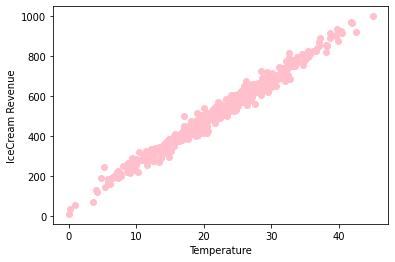

In [112]:
plt.scatter(data.Temperature, data.Revenue, c='pink')
plt.xlabel("Temperature")
plt.ylabel("IceCream Revenue")

Let us split this data into train-test dataset, for training and evaluating our model

In [113]:
from sklearn.model_selection import train_test_split
x=data['Temperature'].values.reshape(-1,1)
y=data['Revenue'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(data.Temperature,data.Revenue,test_size=0.3)

In [114]:
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

Let us create the regression model

In [115]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [116]:
print("Slope(m): ",reg.coef_[0][0])
print("Intercept(c): ",reg.intercept_[0])
print("The Linear model is y = {:.2}*x + {:.3}".format(reg.coef_[0][0],reg.intercept_[0]))

Slope(m):  21.46934415549023
Intercept(c):  45.365251236711686
The Linear model is y = 2.1e+01*x + 45.4


Predictions of test dataset

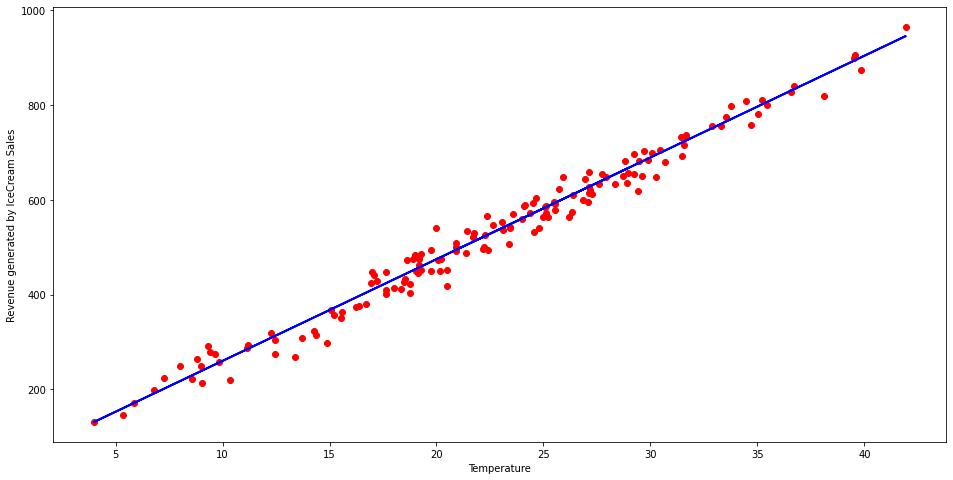

In [117]:
predictions=reg.predict(x_test)
plt.figure(figsize=(16,8))
plt.scatter(x_test,y_test,c='red')
plt.plot(x_test,predictions,c='blue',linewidth=2)
plt.xlabel("Temperature")
plt.ylabel("Revenue generated by IceCream Sales")
plt.show()

Lets calculate errors and see how good the model is

In [118]:
from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(y_test,predictions))
r2score=r2_score(y_test,predictions)
print("Root Mean Squared Error: ",rmse)
print("R2 Score: ",r2score)

Root Mean Squared Error:  24.818995998970873
R2 Score:  0.9794319880873072


In [119]:
pred1=reg.predict([[30],[15]])
print("Ice cream revenue at 30deg: ",pred1[0])
print("Ice cream revenue at 15deg: ",pred1[1])

Ice cream revenue at 30deg:  [689.4455759]
Ice cream revenue at 15deg:  [367.40541357]
